In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 



Data collection and analysis

In [ ]:
#loading the data from CSV file to pandas data frame
df=pd.read_csv('/content/Mall_Customers.csv')

#display frist 5 rows in dataframe

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#finding the number of rows and column in dataframe

In [ ]:
df.shape

(200, 5)

In [ ]:
#getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the annual income and spending score column

In [ ]:
x = df.iloc[:,[3,4]].values

In [ ]:
print(x[0:20])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]
 [19 14]
 [19 99]
 [20 15]
 [20 77]
 [20 13]
 [20 79]
 [21 35]
 [21 66]
 [23 29]
 [23 98]]


Choosing number of clusters
WCSS--> Within CLusters Sum of square

In [ ]:
#finding WCSS value for different clusters
wcss=[]

for i in range(1,11):
   kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
   kmeans.fit(x)

   wcss.append(kmeans.inertia_)

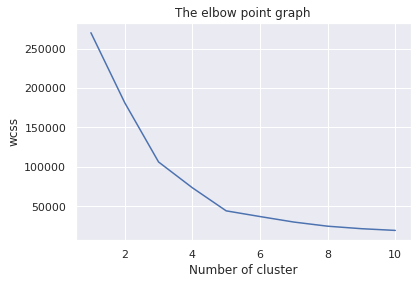

In [ ]:
#plot elbow graph
sns.set()  #load seaborn's default theme and color palette to the session
plt.plot(range(1,11), wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

Optimum number of clusters=5

training the K- means unsupervised learning

In [ ]:
kmeans= KMeans(n_clusters=5, init='k-means++',random_state=0)
#Return a label for each data point based on their Cluster
#data is correspond to which cluster

Y=kmeans.fit_predict(x)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

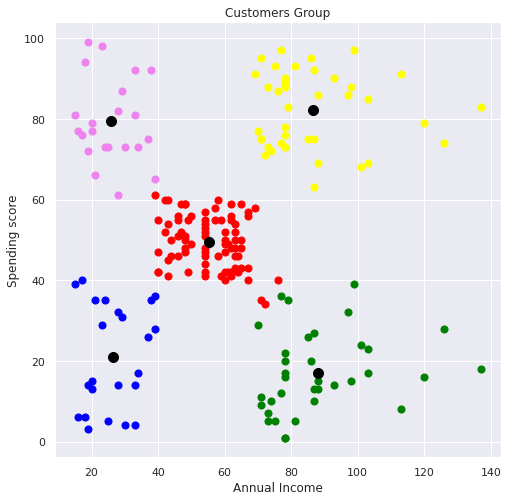

In [ ]:
#ploting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0],x[Y==1,1], s=50, c='red', label='Cluster 1')
plt.scatter(x[Y==2,0],x[Y==2,1], s=50, c='yellow', label='Cluster 1')
plt.scatter(x[Y==3,0],x[Y==3,1], s=50, c='violet', label='Cluster 1')
plt.scatter(x[Y==4,0],x[Y==4,1], s=50, c='blue', label='Cluster 1')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroid')
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()